## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
# 我的筆電沒有用gpu所以就不用 !nvidia-smi

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 我的沒有GPU，所以沒設定

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    x = 2*((x-x.min())/(x.max()-x.min())) -1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_class = 10):
    if y.shape[-1] ==1:
        y = keras.utils.to_categorical(y, num_class)
    return y

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_nerons=[512, 256, 128, 64, 8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_nerons):
        if i==0:
            x = keras.layers.Dense(units= n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units= n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units= output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [10]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 8)                 520       
_________________________________________________________________
output (Dense)               (None, 10)                90  

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.9496 - accuracy: 0.3089 - val_loss: 1.7238 - val_accuracy: 0.4109
Epoch 2/100
50000/50000 [==============================] - 10s 206us/step - loss: 1.6111 - accuracy: 0.4375 - val_loss: 1.5353 - val_accuracy: 0.4677
Epoch 3/100
50000/50000 [==============================] - 12s 241us/step - loss: 1.4452 - accuracy: 0.4915 - val_loss: 1.4564 - val_accuracy: 0.4876
Epoch 4/100
50000/50000 [==============================] - 12s 245us/step - loss: 1.3414 - accuracy: 0.5290 - val_loss: 1.4435 - val_accuracy: 0.4982
Epoch 5/100
50000/50000 [==============================] - 12s 238us/step - loss: 1.2530 - accuracy: 0.5582 - val_loss: 1.3864 - val_accuracy: 0.5203
Epoch 6/100
50000/50000 [==============================] - 13s 252us/step - loss: 1.1672 - accuracy: 0.5888 - val_loss: 1.3936 - val_accuracy: 0.5177
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.1041 - accuracy: 0.9651 - val_loss: 4.0895 - val_accuracy: 0.5318
Epoch 56/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.1032 - accuracy: 0.9655 - val_loss: 4.1343 - val_accuracy: 0.5203
Epoch 57/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.1097 - accuracy: 0.9640 - val_loss: 4.2296 - val_accuracy: 0.5213
Epoch 58/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.1063 - accuracy: 0.9645 - val_loss: 4.1145 - val_accuracy: 0.5236
Epoch 59/100
50000/50000 [==============================] - 11s 214us/step - loss: 0.0869 - accuracy: 0.9715 - val_loss: 4.3315 - val_accuracy: 0.5308
Epoch 60/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.0935 - accuracy: 0.9696 - val_loss: 4.4899 - val_accuracy: 0.5238
Epoch 61/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.1033 - ac

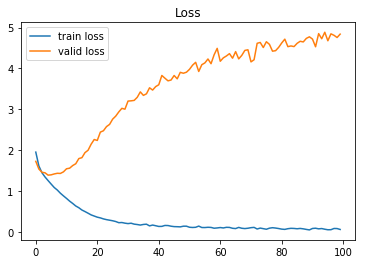

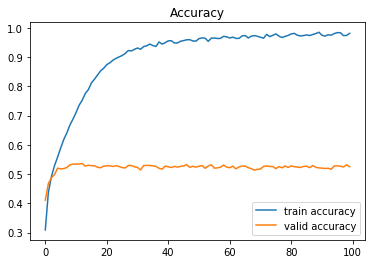

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### Ans: 相較範例，loss的下降速度相較快速。